In [61]:
from NMF_Implementation.base import Implementation, load_data
from NMF_Implementation.L2Norm import Algorithm as L2Norm
from NMF_Implementation.L21Norm import Algorithm as L21Norm
from NMF_Implementation.Noise import missing_grid, salt_and_pepper
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [37]:
def plot_example(model: Implementation, original, transformation):
    ncols = len(original)
    
    # compute things to be shown
    # original is clean
    reconstructed_clean = model.inverse_transform(model.transform(original))
    noisy = transformation(original)
    reconstructed_noisy = model.inverse_transform(model.transform(noisy))
    reconstructed_diffs = reconstructed_clean - reconstructed_noisy
    
    # initialize figures
    fig, axes = plt.subplots(nrows=5, ncols=ncols, figsize=(10, 8))
    fig.subplots_adjust(wspace=0, hspace=0)
    
    for i, image in enumerate(original):
        plt.subplot(5, ncols, -i + 1 * ncols)
        plt.imshow(image, cmap='Greys_r')
    
    for i, image in enumerate(noisy):
        plt.subplot(5, ncols, -i + 2 * ncols)
        plt.imshow(image, cmap='Greys_r')
        
    for i, image in enumerate(reconstructed_noisy):
        plt.subplot(5, ncols, -i + 3 * ncols)
        plt.imshow(image, cmap='Greys_r')
    
    for i, image in enumerate(reconstructed_clean):
        plt.subplot(5, ncols, -i + 4 * ncols)
        plt.imshow(image, cmap='Greys_r')
    
    for i, image in enumerate(reconstructed_diffs):
        plt.subplot(5, ncols, -i + 5 * ncols)
        plt.imshow(image)
        
    # add row labels
    axes[0, 0].set_ylabel('test')
    axes[2, 0].set_ylabel('Altered Images')
    axes[3, 0].set_ylabel('Re-constructed Images')
    
    # disable labels
    #for axis in axes.flatten():
        
    return fig, axes

In [35]:
Xo, Yo = load_data('../data/ORL', (30, 37))
Xy, Yy = load_data('../data/CroppedYaleB', (30, 37))

/home/alexe/Documents/comp5328-a1/Notebooks/NMF_Implementation/base.py:84: UserWarning: could not handle person ../data/ORL/.DS_Store. Skipping...
  warnings.warn(f'could not handle person {person}. Skipping...')
/home/alexe/Documents/comp5328-a1/Notebooks/NMF_Implementation/base.py:84: UserWarning: could not handle person ../data/ORL/README. Skipping...
  warnings.warn(f'could not handle person {person}. Skipping...')
/home/alexe/Documents/comp5328-a1/Notebooks/NMF_Implementation/base.py:84: UserWarning: could not handle person ../data/CroppedYaleB/.DS_Store. Skipping...
  warnings.warn(f'could not handle person {person}. Skipping...')


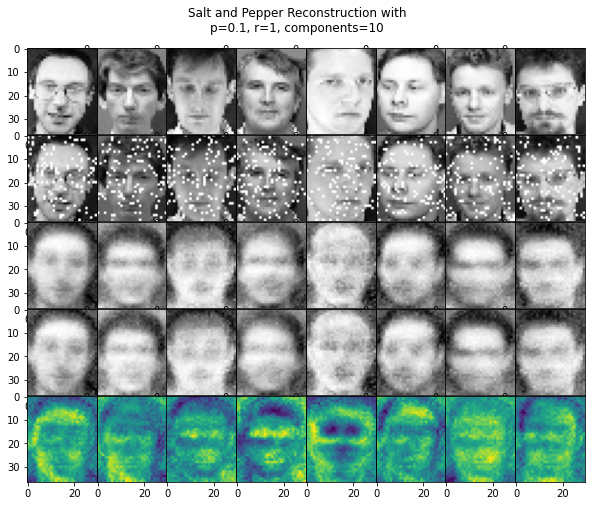

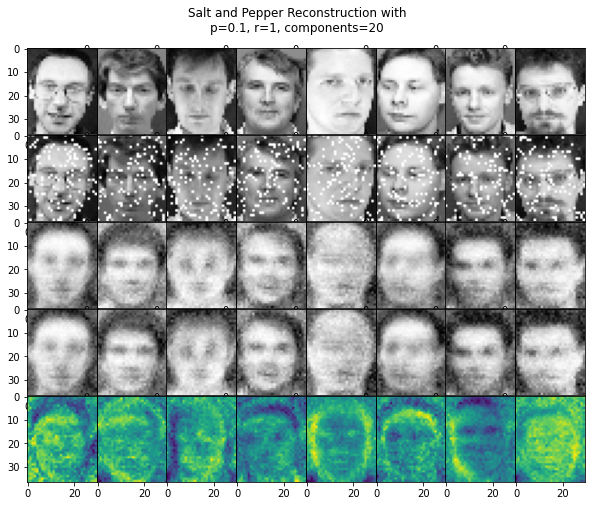

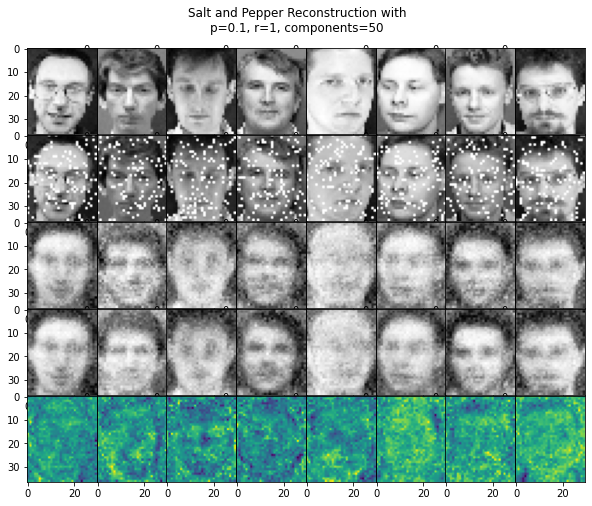

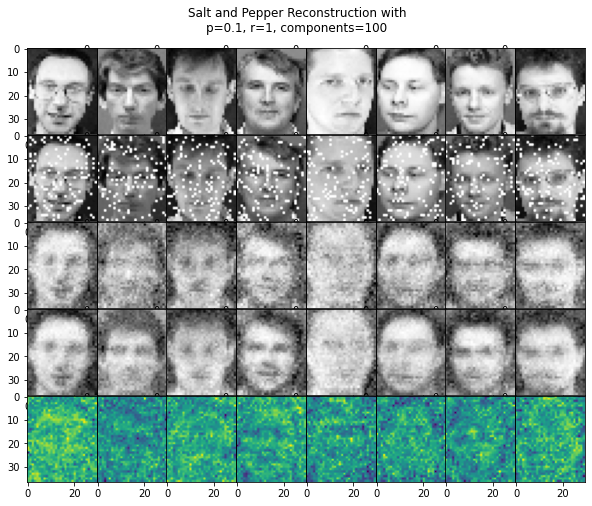

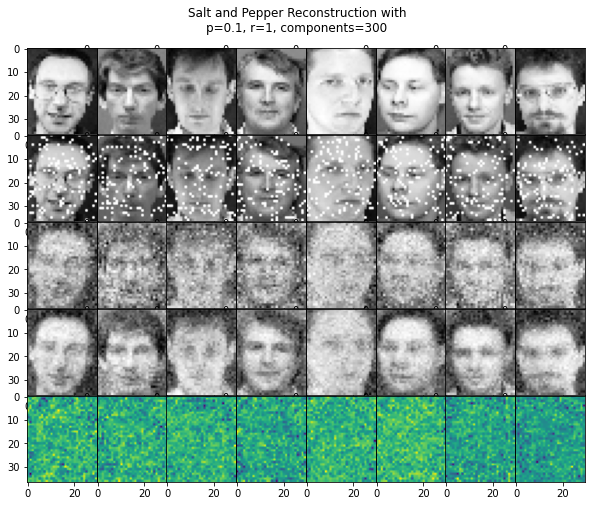

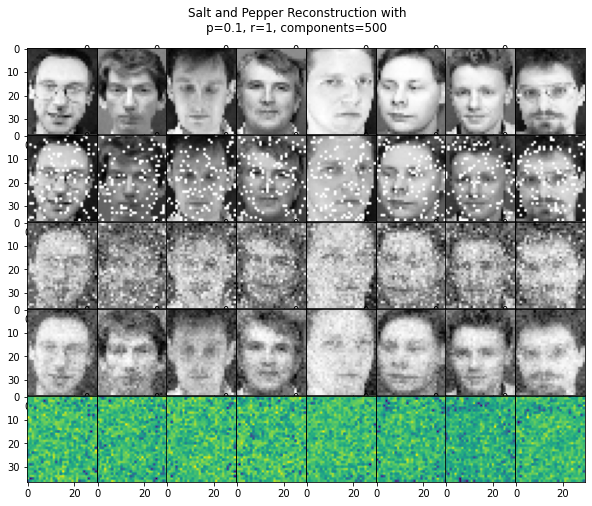

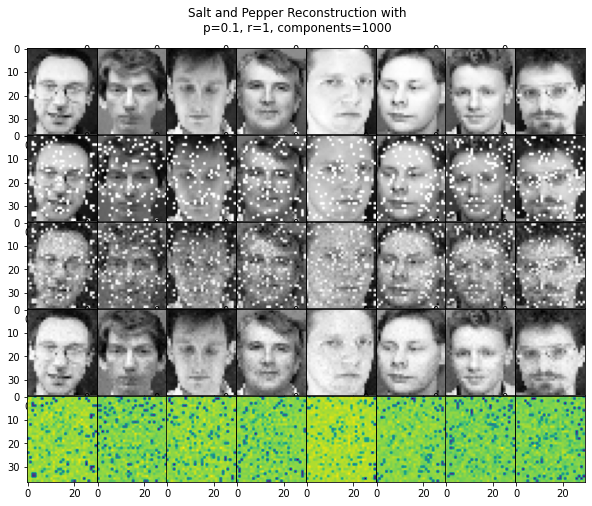

In [74]:
proportion = .1
salt = 1
def noisefunc(X):
    return salt_and_pepper(X, proportion, salt)
# set sample images

sample_images = Xo[np.random.choice(Xo.shape[0], 8, replace=False)]
Xo = Xo

losses = []

for components in [10, 20, 50, 100, 300, 500, 1000]:

    # set model and parameters
    model = L21Norm(components, stop_threshold=-np.inf, max_iter=300)

    # fit the model
    model.fit(noisefunc(Xo))
    
    # plot results
    fig, axes = plot_example(
        model,
        sample_images,
        noisefunc
    )

    fig.suptitle(f'Salt and Pepper Reconstruction with\np={proportion}, r={salt}, components={components}', y=.95)
    #plt.savefig(f'./figures/salt_pepper_noise_p{proportion}_r{salt}_c{components}.png')
    plt.show()
    loss = model.get_metavalues()['training_loss']
    residue = model.get_metavalues()['training_residue']
    losses.extend([
        {'components': components,
         'loss': l,
         'residue': r,
         'iteration': i
        } for i, (l, r) in enumerate(zip(loss, residue))])
    

0              NaN
1     44711.369349
2     38026.842559
3     37906.347363
4     37803.362697
          ...     
93    36705.187625
94    36654.581918
95    36600.772802
96    36543.171780
97    36481.114790
Name: residue, Length: 98, dtype: float64


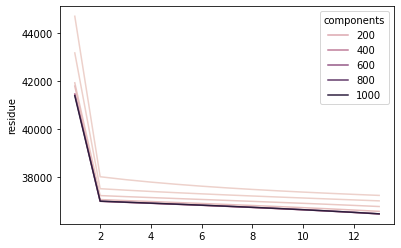

In [73]:
df = pd.DataFrame(losses)
print(df['residue'])
sns.lineplot(data=df, y='residue', hue='components', x='iteration')

In [ ]:
m = L21Norm(80, max_iter=1000, stop_threshold=-np.inf)
m.fit()